In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [2]:
# Fetching data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [5]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [6]:
# Scaling data
column = "Close"
MS = MinMaxScaler()
data1 = MS.fit_transform(stk_data[[column]])

In [7]:
# Splitting the data into train and test sets
training_size = round(len(data1) * 0.80)
X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

In [8]:
# Define trends and lags
trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]

In [9]:
# Function to calculate RMSE and MAPE
def rmsemape(actual, predicted):
    mse = mean_squared_error(actual, predicted, squared=False)
    print(f"RMSE: {mse}")
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"MAPE: {mape}%")
    return mse, mape

In [11]:
# Training and evaluating models
import numpy as np
for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(X_train), len(data1) - 1)
        print(f"Lag={i}, Trend={td}")
        rmsemape(y_test, y_pred)
        print("****")

Lag=1, Trend=n
RMSE: 0.15906733048148705
MAPE: 77.26011468940031%
****
Lag=1, Trend=t
RMSE: 0.16295928192209552
MAPE: 75.44005358969221%
****
Lag=1, Trend=c
RMSE: 0.1607096568896775
MAPE: 108.68720181033939%
****
Lag=1, Trend=ct
RMSE: 0.17848497333130178
MAPE: 70.20517436406291%
****
Lag=2, Trend=n
RMSE: 0.16562577486117838
MAPE: 74.67931781316331%
****
Lag=2, Trend=t
RMSE: 0.14793101477208526
MAPE: 92.14584753966658%
****
Lag=2, Trend=c
RMSE: 0.18425603406010962
MAPE: 125.17072747980814%
****
Lag=2, Trend=ct
RMSE: 0.16461162541578606
MAPE: 77.16775887901639%
****
Lag=3, Trend=n
RMSE: 0.16348500633516178
MAPE: 74.25472920791388%
****
Lag=3, Trend=t
RMSE: 0.14839214197591405
MAPE: 83.8354560092075%
****
Lag=3, Trend=c
RMSE: 0.16823655634770704
MAPE: 114.69511723862611%
****
Lag=3, Trend=ct
RMSE: 0.1653794015129049
MAPE: 75.10282704861933%
****
Lag=4, Trend=n
RMSE: 0.15981828083056093
MAPE: 72.27941616573207%
****
Lag=4, Trend=t
RMSE: 0.17143965435987124
MAPE: 68.51821116251537%
****
Lag

In [12]:
# Forecasting
i = 1
td = 'ct'
model = AutoReg(X_train, lags=i, trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

In [13]:
# Inverse transform the scaled data
aTestNormTable = pd.DataFrame(y_test, columns=[column])
actual_stock_price_test_ori = MS.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame(actual_stock_price_test_ori, columns=[column])

In [14]:
pTestNormTable = pd.DataFrame(y_pred, columns=[column])
predicted_stock_price_test_ori = MS.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame(predicted_stock_price_test_ori, columns=[column])

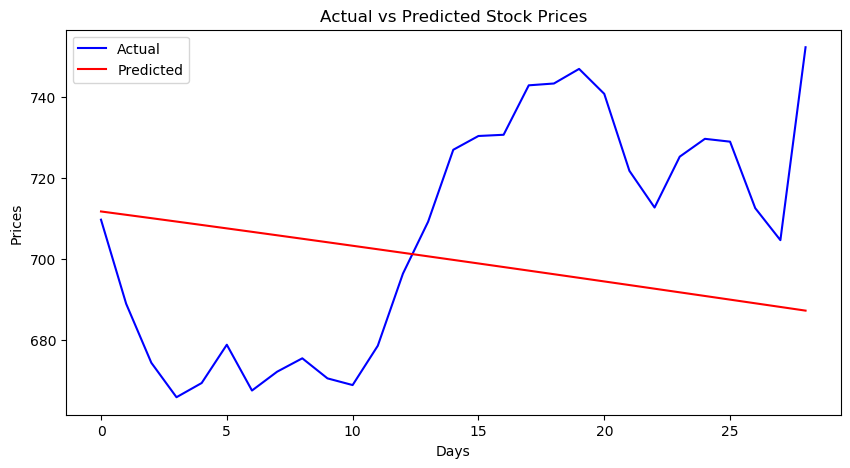

In [15]:
# Plotting actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA.values, color='blue', label="Actual")
plt.plot(predicted_stock_price_test_oriP.values, color='red', label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.show()

In [16]:
# Forecasting future prices
forecast = model_fit.predict(len(data1), len(data1) + 3)
fTestNormTable = pd.DataFrame(forecast, columns=["Closefore"])
forecast_stock_price_test_ori = MS.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = pd.DataFrame(forecast_stock_price_test_ori, columns=["Closefore"])

In [17]:
forecast

array([0.18148725, 0.17680413, 0.17211441, 0.16741842])

In [18]:
fTestNormTable

,Closefore
0,0.181487
1,0.176804
2,0.172114
3,0.167418


In [19]:
forecast_stock_price_test_ori

array([[686.30850274],
       [685.39997584],
       [684.49017084],
       [683.57914836]])

In [20]:
forecast_stock_price_test_oriF

,Closefore
0,686.308503
1,685.399976
2,684.490171
3,683.579148


In [21]:
# Save forecasted prices to CSV
forecast_stock_price_test_oriF.to_csv("CloseAR.csv", index=False)

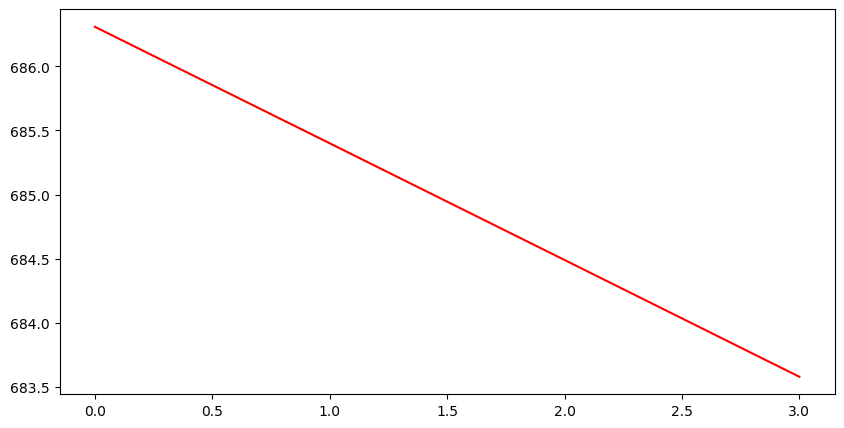

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")